In [48]:
import sys
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [94]:
feature_id = 2

In [95]:
db_name = '/home/ubuntu/HeLa_20KInt/HeLa_20KInt-features-{}-{}.sqlite'.format(feature_id, feature_id)

In [96]:
# get all the feature matches with isolation windows
db_conn = sqlite3.connect(db_name)
feature_isolation_matches_df = pd.read_sql_query("select distinct(precursor_id) from feature_isolation_matches where feature_id={}".format(feature_id), db_conn)
db_conn.close()

In [97]:
feature_isolation_matches_df

,precursor_id
0,26579
1,26603
2,26683
3,27234


In [103]:
precursor_id = 26579

In [104]:
# get all the ms2 peaks for this feature
db_conn = sqlite3.connect(db_name)
ms2_peaks_df = pd.read_sql_query("select * from ms2_peaks where feature_id={} and precursor={} order by peak_id ASC".format(feature_id, precursor_id), db_conn)
db_conn.close()

In [105]:
ms2_peaks_df.head()

,feature_id,peak_id,centroid_mz,composite_mzs_min,composite_mzs_max,centroid_scan,intensity,cofi_scan,cofi_rt,precursor
0,2,1,1036.442,1036401,1036489,591,8882,591.852060,1078.0,26579
1,2,2,1037.446,1037402,1037490,590,5433,590.906497,1078.0,26579
2,2,3,892.392,892359,892431,589,2049,589.120547,1078.0,26579
3,2,4,448.212,448197,448229,589,1783,589.021312,1078.0,26579
4,2,5,675.343,675319,675375,591,2306,591.663487,1078.0,26579


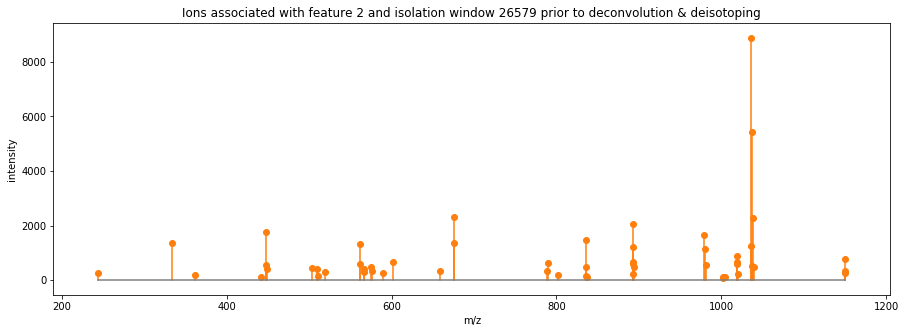

In [106]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(15)
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
ax.stem(ms2_peaks_df.centroid_mz, ms2_peaks_df.intensity, linefmt="C1-", markerfmt="C1o", basefmt="C7-")
plt.xlabel('m/z')
plt.ylabel('intensity')
plt.margins(0.06)
plt.title('Ions associated with feature {} and isolation window {} prior to deconvolution & deisotoping'.format(feature_id, precursor_id))
plt.show()

In [107]:
# get the deconvoluted ions for this feature
db_conn = sqlite3.connect(db_name)
deconvoluted_ions_df = pd.read_sql_query("select * from deconvoluted_ions where feature_id={} and precursor_id={}".format(feature_id, precursor_id), db_conn)
db_conn.close()

In [108]:
deconvoluted_ions_df

,feature_id,precursor_id,hk_monoisotopic_mass,hk_charge,hk_intensity,hk_base_isotope_peak
0,2,26579,448.2120,1,2294,448.212
1,2,26579,561.2950,1,1835,561.295
2,2,26579,1131.5027,2,566,566.255
3,2,26579,1149.5327,2,904,575.270
4,2,26579,675.3430,1,3389,675.343
5,2,26579,788.4290,1,547,788.429
6,2,26579,835.3670,1,2366,835.367
7,2,26579,892.3920,1,3415,892.392
8,2,26579,892.3782,1,1112,893.381
9,2,26579,979.4230,1,2855,979.423


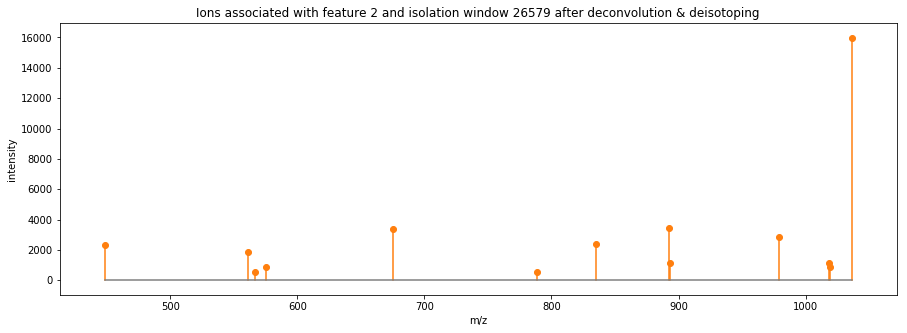

In [114]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(15)
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
ax.stem(deconvoluted_ions_df.hk_base_isotope_peak, deconvoluted_ions_df.hk_intensity, linefmt="C1-", markerfmt="C1o", basefmt="C7-")
plt.xlabel('m/z')
plt.ylabel('intensity')
plt.margins(0.06)
plt.title('Ions associated with feature {} and isolation window {} after deconvolution & deisotoping'.format(feature_id, precursor_id))
plt.show()